# Homework: Learning the tools
Robert Hatem

## 1. Python

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
%matplotlib inline

In [2]:
# API key
quandl.ApiConfig.api_key = "wFcUAbwJv3FbxzDwExsY"

In [3]:
# for quandl data
@functools.lru_cache(maxsize=16)
def fetch_quandl(my_securities, start_date="2011-01-01", end_date="2018-01-01"):
    print("Fetching from Quandl")
    qdata = quandl.get(list(my_securities), start_date=start_date, end_date=end_date,returns="pandas")
    return qdata

In [8]:
tickers = pd.read_csv("zacks-tickers.csv")

FileNotFoundError: [Errno 2] File b'zacks-tickers.csv' does not exist: b'zacks-tickers.csv'

In [4]:
# import data
raw_data = fetch_quandl(('WIKI/ETFC.11', "WIKI/HRB.11"))

Fetching from Quandl


In [5]:
# clean data
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = asset+":"+variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

data = clean_quandl_columns(raw_data)

3.1

In [6]:
# returns
data = data.assign(ETFC_Returns = data['ETFC:Adj. Close'].pct_change())
data = data.assign(HRB_Returns = data['HRB:Adj. Close'].pct_change())

In [7]:
data.head()

,ETFC:Adj. Close,HRB:Adj. Close,ETFC_Returns,HRB_Returns
Date,,,,
2011-01-03,16.2800,9.909937,NaN,NaN
2011-01-04,16.3700,9.759185,0.005528,-0.015212
2011-01-05,16.3600,9.989280,-0.000611,0.023577
2011-01-06,16.2825,9.989280,-0.004737,0.000000
2011-01-07,16.3400,10.140032,0.003531,0.015091


In [ ]:
from sklearn import linear_model

In [67]:
# linear regression
reg_1 = linear_model.LinearRegression()
reg_1.fit(data['ETFC:Adj. Close'].values.reshape(-1,1), data['HRB:Adj. Close'].values.reshape(-1,1))
y1_pred = reg_1.predict(data['ETFC:Adj. Close'].values.reshape(-1,1))

reg_2 = linear_model.LinearRegression()
reg_2.fit(data['ETFC_Returns'].values.reshape(-1,1)[1:], data['HRB_Returns'].values.reshape(-1,1)[1:])
y2_pred = reg_2.predict(data['ETFC_Returns'].values.reshape(-1,1)[1:])

3.1 (a) - daily closing price

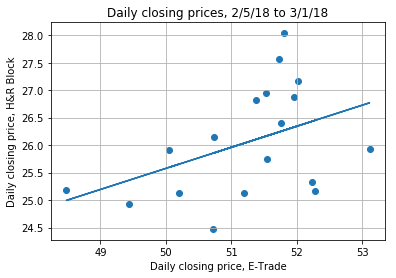

In [84]:
plt.scatter(data['ETFC:Adj. Close'], data['HRB:Adj. Close'])
plt.plot(data['ETFC:Adj. Close'], y1_pred)
plt.grid()

plt.xlabel('Daily closing price, E-Trade')
plt.ylabel('Daily closing price, H&R Block')
plt.title('Daily closing prices, 2/5/18 to 3/1/18');

3.2 (a) - daily returns

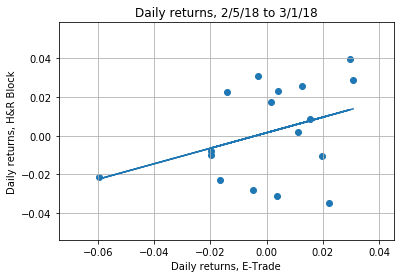

In [85]:
plt.scatter(data['ETFC_Returns'], data['HRB_Returns'])
plt.plot(data['ETFC_Returns'].values.reshape(-1,1)[1:], y2_pred)
plt.grid()

plt.xlabel('Daily returns, E-Trade')
plt.ylabel('Daily returns, H&R Block')
plt.title('Daily returns, 2/5/18 to 3/1/18');